In [1]:
# Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

1. Convex Hull

In [2]:
# Import image

img = cv2.imread(r'images/star.png')
imgCopy = img.copy()

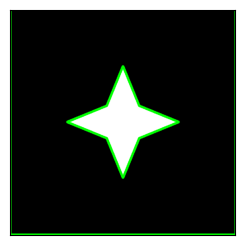

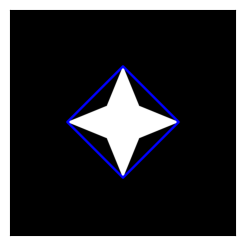

In [3]:
# Convert to Grayscale
imgGray = cv2.cvtColor(imgCopy, cv2.COLOR_BGR2GRAY)

# Create binary thresholded image
_, binary = cv2.threshold(imgGray, 230, 255, cv2.THRESH_BINARY_INV)

# Find all contours in the image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw all contours
cv2.drawContours(imgCopy, contours, -1, (0,255,0), 5)

# Select the contours
cnt = contours[1]

# get the convex hull
hull =cv2.convexHull(cnt)

# Darw the convex hull
hullImg = img.copy()
cv2.drawContours(hullImg, [hull], 0, (0, 0, 255), 5)

# Display the result
plt.subplot(121)
plt.tick_params(left = False, right =False, labelleft=False, labelbottom = False, bottom=False)
plt.imshow(imgCopy)
plt.show()

plt.subplot(122)
plt.tick_params(left = False, right =False, labelleft=False, labelbottom = False, bottom=False)
plt.imshow(hullImg)
plt.show()

2. Convexity Defects

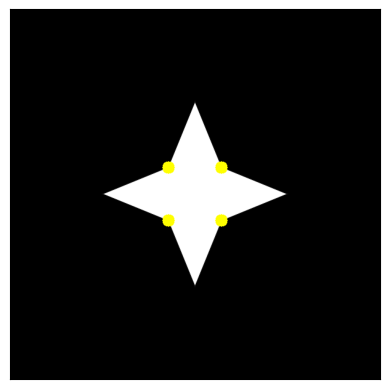

In [4]:
# Get the convex hull
hull = cv2.convexHull(cnt, returnPoints=False) #mind the 'returnPoints = False'ArithmeticError

# Get a copy to draw convexity defects
defectsImg = img.copy()

# Find convexity defects
defects = cv2.convexityDefects(cnt, hull)

#draw circels on convexity defects
for i in range(defects.shape[0]):
    s,e,f,d = defects[i,0]
    fpoint = tuple(cnt[f][0])
    cv2.circle(defectsImg, fpoint, 10, [255, 255, 0], -1)

# display he result
plt.subplot(111)
plt.tick_params(left = False, right =False, labelleft=False, labelbottom = False, bottom=False)
plt.imshow(defectsImg)
plt.show()

3. Contours limitations in instance segmentation

In [5]:
imgCoins = cv2.imread(r'images/water_coins.jpg', 0)

ret, thresh = cv2.threshold(imgCoins, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
_, cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

img2 = imgCoins.copy()
cv2.drawContours(img2, cnts, -1, (0, 255, 0), 3)

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\drawing.cpp:2538: error: (-215:Assertion failed) npoints > 0 in function 'cv::drawContours'


4. Watershed Algorithem

In [ ]:
# 1. Background extraction
img = cv2.imread(r'images/water_coins.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# applying dilation for sure_bg detection
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# defining kernel for opening operation
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 2)

# after opening, will perform dilation
sureBG = cv2.dilate(opening, kernel, iterations = 3)

In [ ]:
# 2. Foreground extraction
distTransform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)

ret, sureFG = cv2.threshold(distTransform, 0.7*distTransform.max(), 255, 0)
sureFG = np.uint8(sureFG)

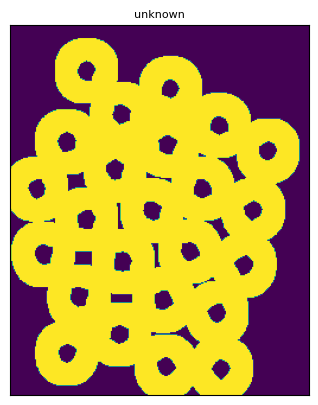

In [ ]:
# finding the unknown area (neither sure foreground nor for backgroubd)

unkown = cv2.subtract(sureBG, sureFG)
# cv2.imshow('unknown', unkown)

# plt.figure(figsize=(8,8), num='test.img')

plt.subplot(1, 1, 1)
plt.xticks([]), plt.yticks([])
plt.title('unknown', fontsize= 8)
plt.imshow(unkown)

In [ ]:
# applyning watershed algo

ret, markers = cv2.connectedComponents(sureFG)
print(markers)

# add one so that sure backgorund is not 0
markers = markers + 1

# making theunkonw area as 0
markers[unkown == 255] = 0
markers = cv2.watershed(img, markers)

# boundry region is marked with -1
img[markers == -1] = (255, 0, 0)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
